<a href="https://colab.research.google.com/github/FeritMario/Projekt/blob/main/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

# Pregled podataka
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
describe_table = data.describe()
describe_table

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<ipython-input-14-13f841760f62>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette=['#0d6efd', '#dc3545'])


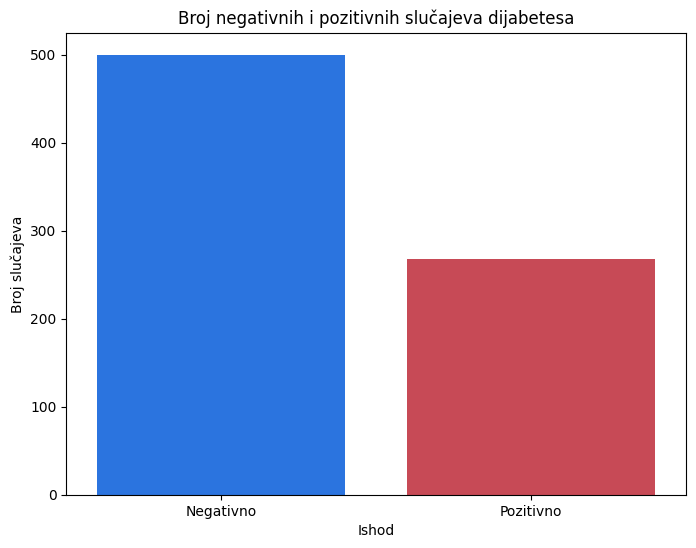

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=data, palette=['#0d6efd', '#dc3545'])
plt.title('Broj negativnih i pozitivnih slučajeva dijabetesa')
plt.xlabel('Ishod')
plt.ylabel('Broj slučajeva')
plt.xticks(ticks=[0, 1], labels=['Negativno', 'Pozitivno'])
plt.show()

In [ ]:
data.head()
data.describe()
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
from sklearn.linear_model import LogisticRegression

# Izgradnja modela
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



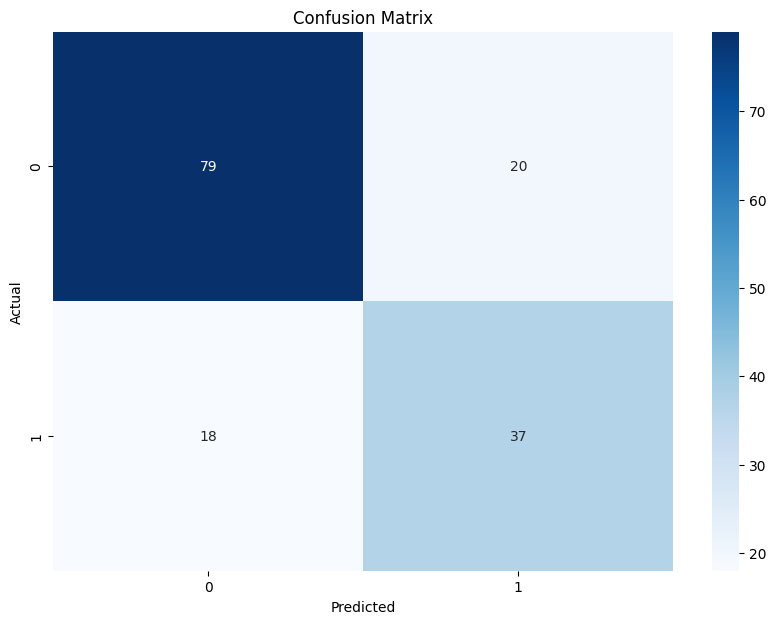

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display


pregnancies = widgets.FloatText(description="Pregnancies:")
glucose = widgets.FloatText(description="Glucose:")
blood_pressure = widgets.FloatText(description="Blood Pressure:")
skin_thickness = widgets.FloatText(description="Skin Thickness:")
insulin = widgets.FloatText(description="Insulin:")
bmi = widgets.FloatText(description="BMI:")
dpf = widgets.FloatText(description="Diabetes Pedigree Function:")
age = widgets.FloatText(description="Age:")
output = widgets.Output()


def predict_diabetes(b):
    input_data = {
        'Pregnancies': pregnancies.value,
        'Glucose': glucose.value,
        'BloodPressure': blood_pressure.value,
        'SkinThickness': skin_thickness.value,
        'Insulin': insulin.value,
        'BMI': bmi.value,
        'DiabetesPedigreeFunction': dpf.value,
        'Age': age.value
    }
    input_df = pd.DataFrame([input_data])
    scaled_data = scaler.transform(input_df)
    prediction = model.predict(scaled_data)[0]
    with output:
        output.clear_output()
        print("Diabetes prediction:", "Positive" if prediction == 1 else "Negative")


predict_button = widgets.Button(description="Predict")
predict_button.on_click(predict_diabetes)


input_widgets = widgets.VBox([pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age, predict_button, output])
display(input_widgets)
